In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
pregnecies = df['Pregnancies'].to_numpy()
glucose = df['Glucose'].to_numpy()
blood_pressure = df['BloodPressure'].to_numpy()
skin_thickness = df['SkinThickness'].to_numpy()
insulin = df['Insulin'].to_numpy()
bmi = df['BMI'].to_numpy()
diabetes_pedigree = df['DiabetesPedigreeFunction'].to_numpy()
age = df['Age'].to_numpy()
outcome = df['Outcome'].to_numpy()

X_train = np.array([pregnecies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]).T
y_train = outcome
w = np.array([1,1,1,1,1,1,1,1])
b = 0

In [4]:
def zscore(X:list) -> list:
    return (X - np.mean(X))/np.std(X)

X_train_norm = np.array([zscore(pregnecies), zscore(glucose), zscore(blood_pressure), zscore(skin_thickness), zscore(insulin), zscore(bmi), zscore(diabetes_pedigree), zscore(age)]).T

In [5]:
def f_wb(X:list, w:list, b:float) -> list:
    return (1/(1 + np.exp(-(np.dot(X,w) + b))))

In [6]:
def costFunction(X:list, Y:list, w:list, b:float, lmbda:float) -> list:
    m = X.shape[0]
    y_hat = f_wb(X, w, b)
    J = -1/m * np.sum(Y*np.log(y_hat) + (1-Y)*np.log(1-y_hat)) + lmbda/(2*m) * np.sum(w**2) # Regularization term
    return J


In [7]:
def gradients(X:list, Y:list, w:list, b:float, lmbda:float) -> tuple:
    m, n = X.shape
    dw = np.zeros(n)
    db = 0
    for i in range(m):
        y_hat = f_wb(X, w, b)
        db += 1/m * (y_hat[i] - Y[i])
        for j in range(n):
            dw[j] = 1/m * ((y_hat[i] - Y[i])*(X[i,j]))
    dw += lmbda/m * w  # Regularization term
    return dw, db     

In [8]:
def gradientDescent(X:list, Y:list, w_ini:list, b_ini:float, alpha:float, num_iters:int, lmbda:float) -> tuple:
    m,n = X.shape
    w = copy.deepcopy(w_ini)
    b = copy.deepcopy(b_ini)
    costs = []
    for i in range(num_iters):
        dw, db = gradients(X, Y, w, b, lmbda)
        w = w - alpha*dw
        b = b - alpha*db

        if i<100000:      # prevent resource exhaustion 
            costs.append(costFunction(X, Y, w, b, lmbda))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {costs[-1]}   ")
    return w, b, costs

In [10]:
w_ini = np.zeros(8)
b_ini = 0
alpha = 0.03
num_iters = 1000
lmbda = 1

wf, bf, costHistory = gradientDescent(X_train_norm, outcome, w_ini, b_ini, alpha, num_iters, lmbda)
print(f"w final = {wf}")
print(f"b final = {bf}")

Iteration    0: Cost 0.6924561940506861   
Iteration  100: Cost 0.6565617345839585   
Iteration  200: Cost 0.6478040661770046   
Iteration  300: Cost 0.6452148449253848   
Iteration  400: Cost 0.6441056957014717   
Iteration  500: Cost 0.6433697525946683   
Iteration  600: Cost 0.6427343770366758   
Iteration  700: Cost 0.6421302626471941   
Iteration  800: Cost 0.6415392204651551   
Iteration  900: Cost 0.6409562485317719   
w final = [ 0.01177189  0.01216388 -0.00064434 -0.00914511  0.00965413  0.00281629
  0.00660131  0.01214096]
b final = -0.6231145646827112


Theta: 0.0, Accuracy: 0.3489583333333333
Theta: 0.001, Accuracy: 0.3489583333333333
Theta: 0.002, Accuracy: 0.3489583333333333
Theta: 0.003, Accuracy: 0.3489583333333333
Theta: 0.004, Accuracy: 0.3489583333333333
Theta: 0.005, Accuracy: 0.3489583333333333
Theta: 0.006, Accuracy: 0.3489583333333333
Theta: 0.007, Accuracy: 0.3489583333333333
Theta: 0.008, Accuracy: 0.3489583333333333
Theta: 0.009000000000000001, Accuracy: 0.3489583333333333
Theta: 0.01, Accuracy: 0.3489583333333333
Theta: 0.011, Accuracy: 0.3489583333333333
Theta: 0.012, Accuracy: 0.3489583333333333
Theta: 0.013000000000000001, Accuracy: 0.3489583333333333
Theta: 0.014, Accuracy: 0.3489583333333333
Theta: 0.015, Accuracy: 0.3489583333333333
Theta: 0.016, Accuracy: 0.3489583333333333
Theta: 0.017, Accuracy: 0.3489583333333333
Theta: 0.018000000000000002, Accuracy: 0.3489583333333333
Theta: 0.019, Accuracy: 0.3489583333333333
Theta: 0.02, Accuracy: 0.3489583333333333
Theta: 0.021, Accuracy: 0.3489583333333333
Theta: 0.022,

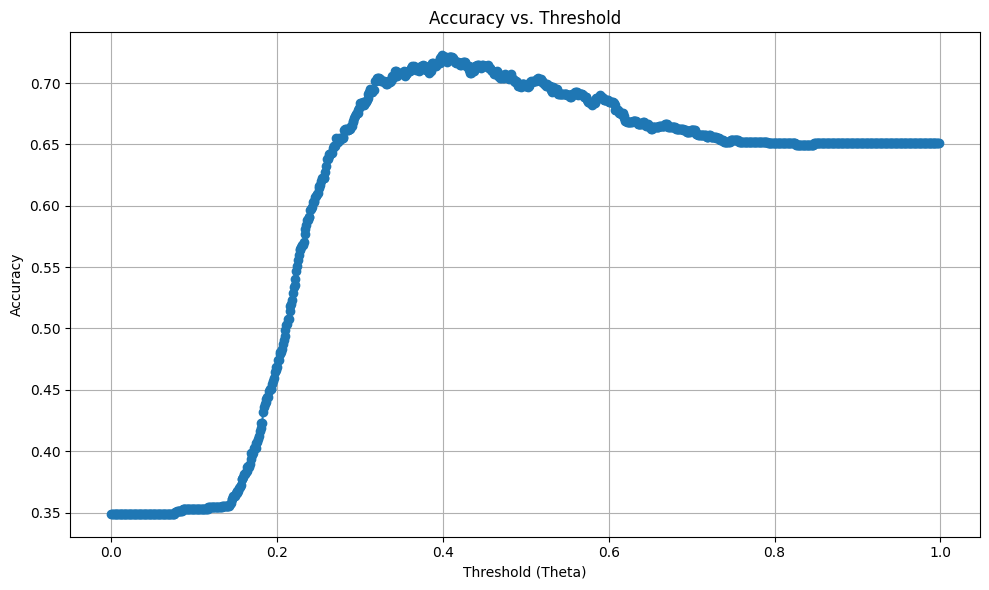

In [ ]:

# found parameters after approx 100000 iterations
wf = np.array([ 0.25409894,  0.26256027, -0.01390825, -0.19739939,  0.20838664,  0.06079018,
  0.14249072,  0.26206546])
bf = -0.6794272945037793

# Find optimal theta value
theta_values = np.arange(0.000, 0.999, 0.001)  # Values from 0.40 to 0.50 in steps of 0.001
accuracies = []

g = f_wb(X_train_norm, wf, bf)  # Calculate predictions once

for theta in theta_values:
    new = np.zeros_like(outcome)
    
    for i in range(len(new)):
        if g[i] < theta:
            new[i] = 0
        else:
            new[i] = 1
    
    accuracy = np.mean(new == outcome)
    accuracies.append(accuracy)
    print(f"Theta: {theta}, Accuracy: {accuracy}")

# Find and use best threshold
best_idx = np.argmax(accuracies)
best_theta = theta_values[best_idx]
best_accuracy = accuracies[best_idx]

print(f"\nBest theta: {best_theta}")
print(f"Best accuracy: {best_accuracy}")

# Visualize results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(theta_values, accuracies, '-o')
plt.xlabel('Threshold (Theta)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# final predictions
final_predictions = np.zeros_like(outcome)
for i in range(len(final_predictions)):
    if g[i] < best_theta:
        final_predictions[i] = 0
    else:
        final_predictions[i] = 1